# Chronos Usage Example

## Loading Chronos Model

In [1]:
import os 
import sys
import torch
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import ChronosModel
from samay.dataset import ChronosDataset

repo = "amazon/chronos-t5-small"
chronos_model = ChronosModel(repo=repo)

Loading Chronos model from Huggingface repository


## Define the datasets

In [2]:
train_dataset = ChronosDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='train', batch_size=8)
val_dataset = ChronosDataset(name="ett", datetime_col='date', path='../src/samay/models/moment/data/ETTh1.csv', 
                             mode='test', batch_size=8)

## Visualize the zero-shot forecasting

/nethome/sanand315/Samay/src/samay/model.py:349: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seq = torch.tensor(input_seq)


(465, 7, 512)


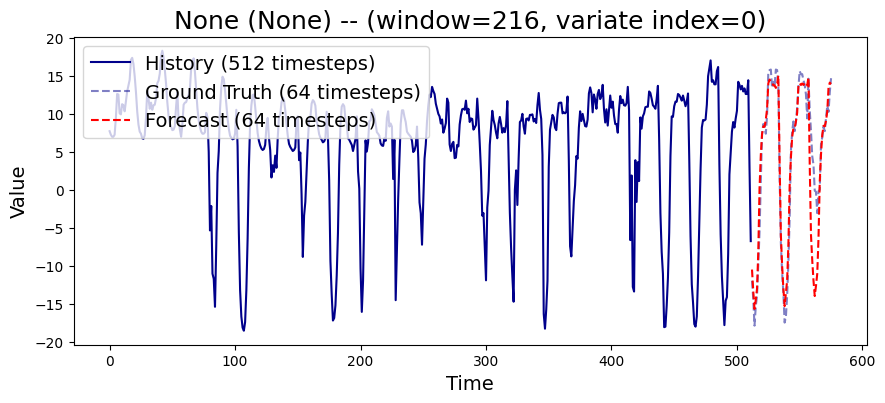

In [3]:
chronos_model.plot(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])

## Evaluate the zero-shot Chronos Model

In [4]:
metrics = chronos_model.evaluate(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])
print(metrics)

/nethome/sanand315/Samay/src/samay/model.py:392: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seq = torch.tensor(input_seq)


{'mse': 11.590527609525598, 'mae': 1.6260503437874845, 'mase': 1.7031729457074847, 'mape': 1075.0397618874017, 'rmse': 3.4044863943810375, 'nrmse': 0.07414111256776963, 'smape': 0.40731969300987053, 'msis': 0.05354113874349989, 'nd': 0.4363987624982476, 'mwsq': 0.15898334730651295, 'crps': 59.67582725645754}


## Finetune Chronos Model on the ETT dataset

In [5]:
chronos_model.finetune(train_dataset)

/nethome/sanand315/Samay/src/samay/models/chronosforecasting/chronos/chronos.py:182: UserWarning: torch.searchsorted(): input value tensor is non-contiguous, this will lower the performance due to extra data copy when converting non-contiguous tensor to contiguous, please use contiguous input value tensor if possible. This message will only appear once per program. (Triggered internally at ../aten/src/ATen/native/BucketizationUtils.h:32.)
  torch.bucketize(
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch 0, Loss: 3.8853468871584127
Epoch 1, Loss: 3.856926004068983
Epoch 2, Loss: 3.8177228118077697
Epoch 3, Loss: 3.7838376551526585
Epoch 4, Loss: 3.75305997486759


## Evaluate the Finetuned Chronos Model

In [6]:
metrics = chronos_model.evaluate(val_dataset, horizon_len=64, quantile_levels=[0.1, 0.5, 0.9])
print(metrics)

{'mse': 10.774458382130508, 'mae': 1.5770615879544716, 'mase': 1.6518606822849926, 'mape': 987.5218092131197, 'rmse': 3.282447011321052, 'nrmse': 0.07148340312528659, 'smape': 0.40177552138582084, 'msis': 0.052689324448795, 'nd': 0.42325117915094523, 'mwsq': 0.7979921382474897, 'crps': 56.93112004994603}
